In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [29]:
startup=pd.read_csv("50_Startups.csv")
startup

,RD,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [30]:
startup.shape

(50, 5)

In [31]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RD              50 non-null     float64
 1   Administration  50 non-null     float64
 2   MarketingSpend  50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [32]:
startup.isna().sum()

RD                0
Administration    0
MarketingSpend    0
State             0
Profit            0
dtype: int64

In [33]:
startup.corr()

,RD,Administration,MarketingSpend,Profit
RD,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MarketingSpend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


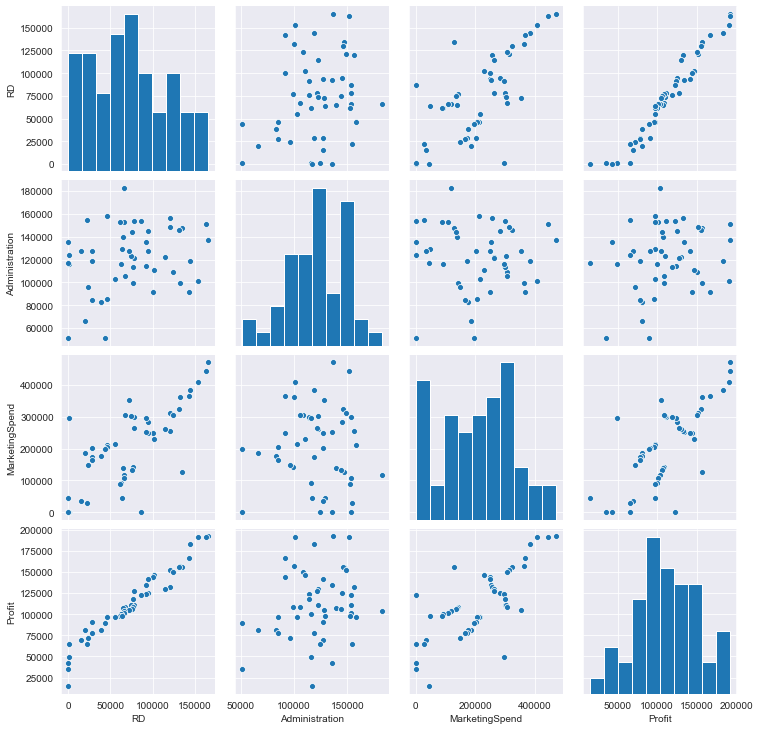

In [34]:
sns.set_style(style='darkgrid')
sns.pairplot(startup)

In [35]:
import statsmodels.formula.api as smf
model=smf.ols('Profit~Administration+MarketingSpend+RD',data=startup).fit()

In [36]:
model.params

Intercept         50122.192990
Administration       -0.026816
MarketingSpend        0.027228
RD                    0.805715
dtype: float64

In [37]:
print(model.tvalues,'\n',model.pvalues)

Intercept          7.626218
Administration    -0.525507
MarketingSpend     1.655077
RD                17.846374
dtype: float64 
 Intercept         1.057379e-09
Administration    6.017551e-01
MarketingSpend    1.047168e-01
RD                2.634968e-22
dtype: float64


In [38]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           4.53e-30
Time:                        15:06:48   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
MarketingSpend     0.0272      0.016      1.655      0.105      -0.006       0.060
RD                 0.8057      0.045     17.846      0.000       0.715       0.897
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
ml_A=smf.ols('Profit~Administration',data=startup).fit()
print(ml_A.tvalues,'\n',ml_A.pvalues)

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [42]:
ml_M=smf.ols('Profit~MarketingSpend',data=startup).fit()
print(ml_M.tvalues,'\n',ml_M.pvalues)

Intercept         7.808356
MarketingSpend    7.802657
dtype: float64 
 Intercept         4.294735e-10
MarketingSpend    4.381073e-10
dtype: float64


In [43]:
ml_AM=smf.ols('Profit~Administration+MarketingSpend',data=startup).fit()
print(ml_AM.tvalues,'\n',ml_AM.pvalues)
ml_AM.summary()

Intercept         1.142741
Administration    2.467779
MarketingSpend    8.281039
dtype: float64 
 Intercept         2.589341e-01
Administration    1.729198e-02
MarketingSpend    9.727245e-11
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           2.50e-10
Time:                        15:18:35   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Administration     0.3237      0.131      2.468      0.017       0.060       0.588
MarketingSpend     0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
rsq_MarketingSpend = smf.ols('MarketingSpend~Administration+RD',data=startup).fit().rsquared  
vif_MarketingSpend = 1/(1-rsq_MarketingSpend)

rsq_Administration=smf.ols('Administration~MarketingSpend+RD',data=startup).fit().rsquared
vif_Administration=1/(1-rsq_Administration)

rsq_RD=smf.ols('RD~Administration+MarketingSpend',data=startup).fit().rsquared
vif_RD=1/(1-rsq_RD)

d1 = {'Variables':['Administration','MarketingSpend','RD'],'VIF':[vif_MarketingSpend,vif_Administration,vif_RD]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame


,Variables,VIF
0,Administration,2.326773
1,MarketingSpend,1.175091
2,RD,2.468903


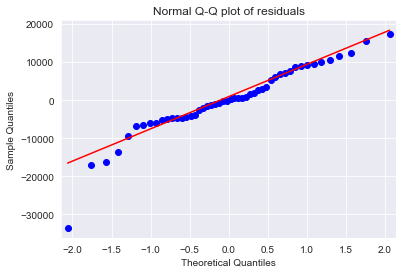

In [46]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [47]:
list(np.where(model.resid>5))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

In [48]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

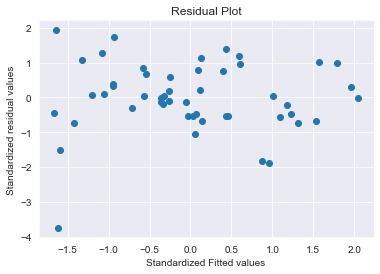

In [49]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

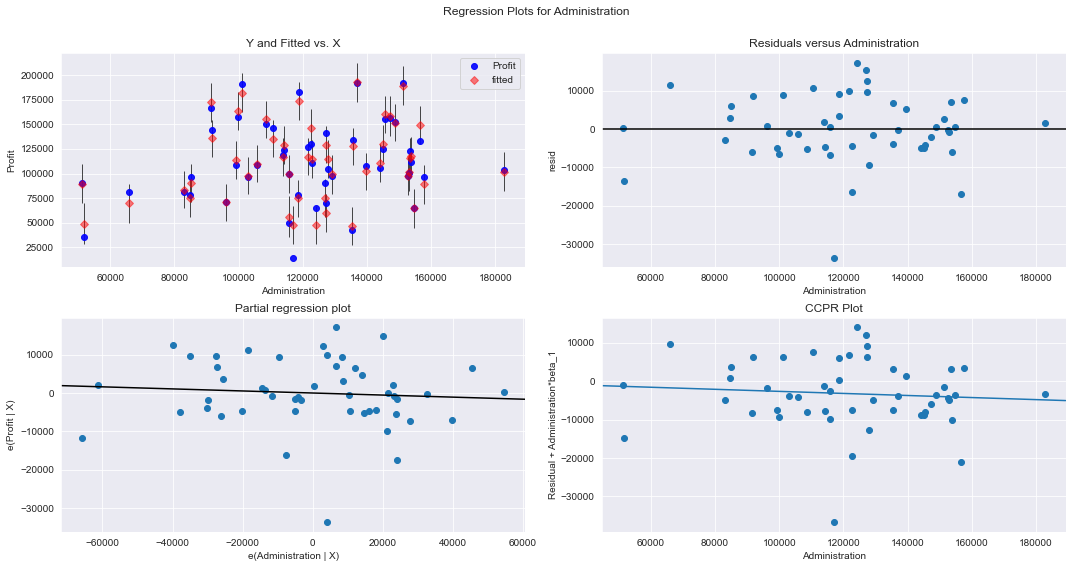

In [50]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)  #exog= exogeneous means internal variable i.e model here
plt.show()

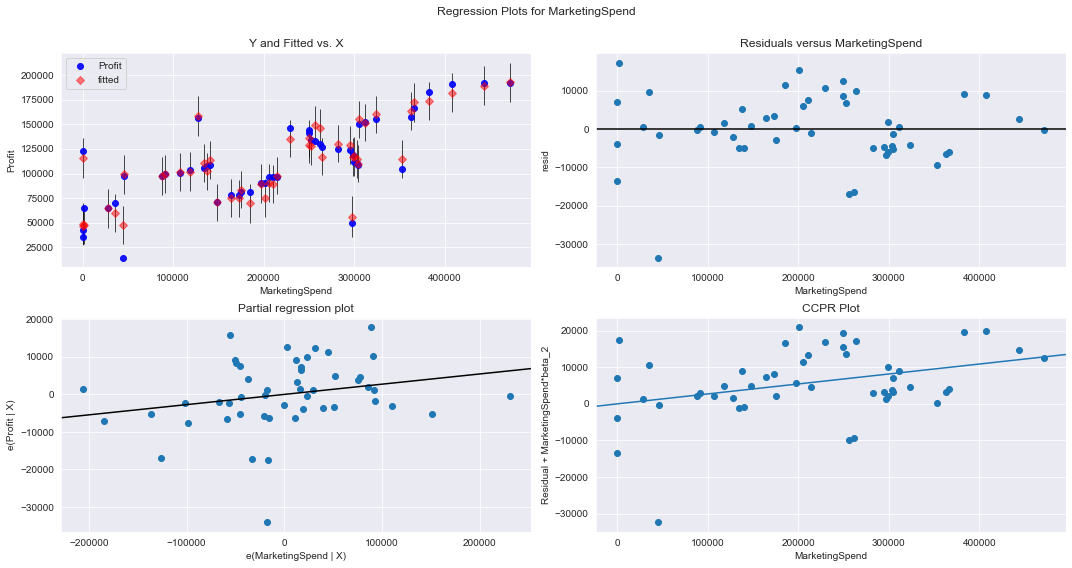

In [51]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MarketingSpend", fig=fig)  #exog= exogeneous means internal variable i.e model here
plt.show()

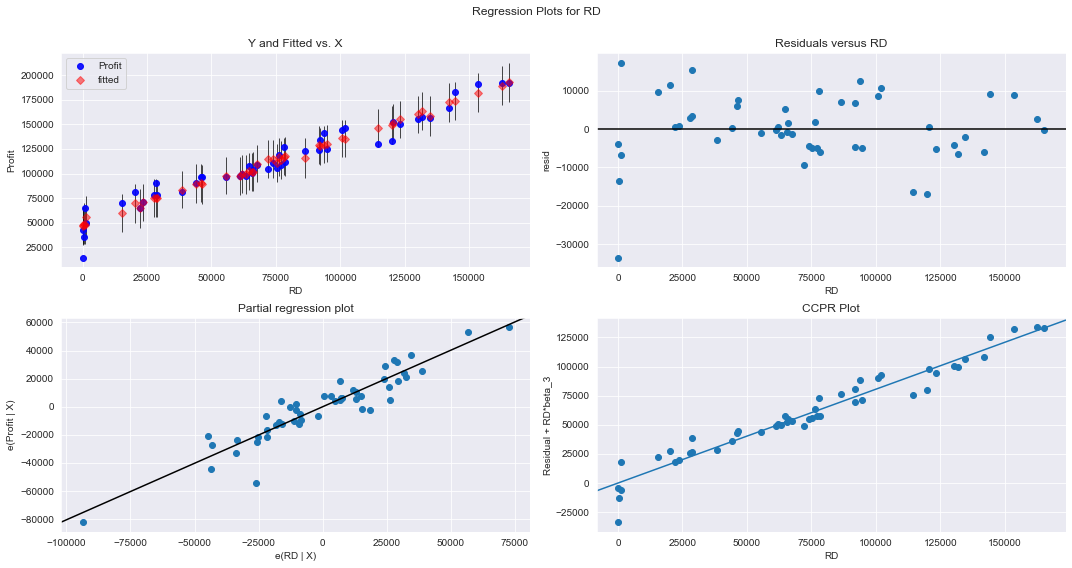

In [52]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RD", fig=fig)  #exog= exogeneous means internal variable i.e model here
plt.show()

In [53]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

<ipython-input-54-6b9bacfbbd39>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(startup)), np.round(c, 3))             #stem for stem plot


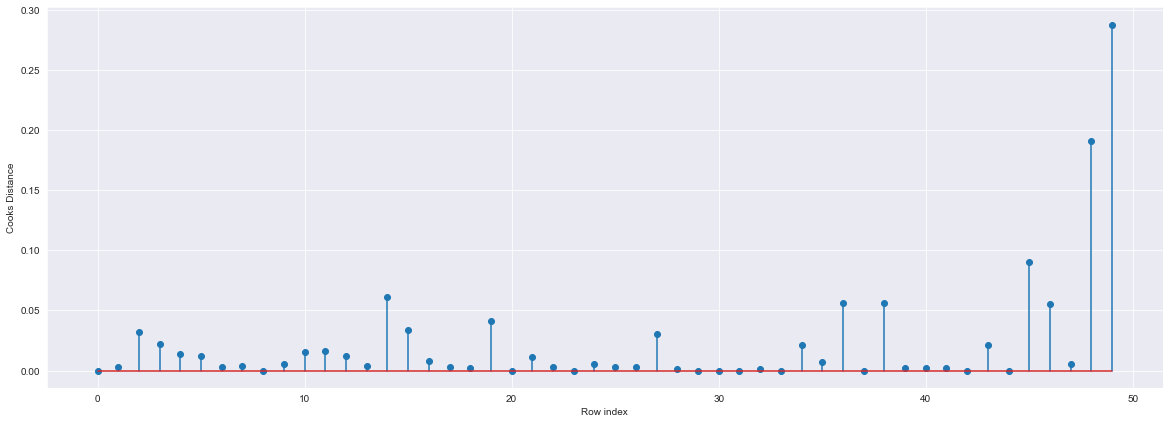

In [54]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup)), np.round(c, 3))             #stem for stem plot
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [55]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)

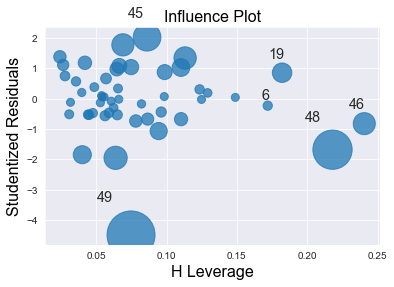

In [56]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [57]:
k = startup.shape[1]
n = startup.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

In [62]:
final_ml= smf.ols('Profit~Administration+MarketingSpend+RD',data = startup).fit()

In [59]:
(final_ml.rsquared)

0.9507459940683246

In [65]:
pred_y = final_ml.predict(startup)

In [66]:
pred_y

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


In [67]:
new_data=pd.DataFrame({'Administration':140000,'MarketingSpend':125000,'RD':225000},index=[1])

In [68]:
final_ml.predict(new_data)

1    231057.351746
dtype: float64